<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 11, Day 2</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 25 March 2020</div>

# Graph theory and the dynamics of infections

Modern [Graph theory](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg) was born in the city of St. Petersburg, Russia, where [Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) lived. In this notebook, we will consider graph ***models***, which you now know is all about the ***phenomenon*** that generated the graph: Given the graph, what was its generating mechanism: an *inverse* problem, i.e. ***data science***!

<br />
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png" width=400 />
</center>

A graph has **nodes** (also called *vertices*) and **edges** that connect them. Edges can be **directed** (Twitter graphs), or not (facebook graphs).
```(python)
pip install networkx
```
Here is a simple graph that we create by creating edges from nodes. Note that as we create edges from nodes, if the nodes do not exist, they are automatically created (so, no need to create nodes because we don't really care about disconnected nodes!).

We also assign a color to each node (because we are going to use colors to describe infection state for individuals). If the node is either `A`, `D`, or `H`, the color is prescribed, all other nodes default to 0.25.

C:\Users\liaoz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


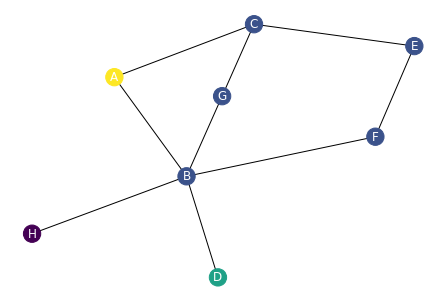

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

This is a cyclic graph, with 24 nodes and 24 node colors according to `matplotlib`'s `Blues` color map (`cm`):

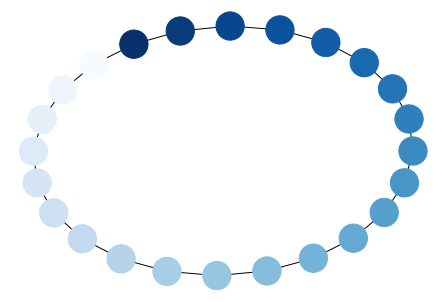

In [5]:
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

Ok, let's dig deeper into graph types. 

## Graph types

Networks are categorized by the [degrees] of their nodes. The degree distribution (pdf) $P(k)$ of a network is then defined to be the fraction of nodes in the network with degree $k$. The same information is also sometimes presented in the form of a **cumulative degree distribution** (cdf): The fraction of nodes with degree *smaller* than $k$.

>**Definition**: The **degree** of a **node** in a network (sometimes referred to incorrectly as the **/connectivity*) is the number of connections or edges the node has to other nodes. Thus if there are $n$ nodes in total in a network and $n_k$ of them have degree $k$, then the probability that a node has degree $n_k$ is $P(k) = n_k/n$.

The degree distribution is very important in studying networks. The simplest and most *beautiful* (可爱极了) network model, the [Erdős–Rényi graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) (ER) model, in which each of $n$ nodes is independently connected (or not) with probability $p$ (or $1 − p$), has a **binomial distribution of degrees k**:

$$P(k) = (_k^{n-1}) p^k \, (1-p)^{n-1-k}$$

Recall that the binomial distribution with parameters $n$ and $k$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent *and different* experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one with probability $k$ or failure/no/false/zero with probability $1 − k$.

A single success/failure experiment is called a **Bernoulli trial** or Bernoulli experiment and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., $n = 1$, the binomial distribution is a Bernoulli distribution. 

> Suppose a *biased* (crooked) coin comes up heads with probability 0.3 when tossed. What is the probability of achieving (exactly) 5 heads after six tosses? It's 

$$0.3 * 0.3 * 0.3 * 0.3 * 0.3 * 0.7 +\\
0.3 * 0.3 * 0.3 * 0.3 * 0.7 * 0.3 +\\
0.3 * 0.3 * 0.3 * 0.7 * 0.3 * 0.3 +\\
0.3 * 0.3 * 0.7 * 0.3 * 0.3 * 0.3 +\\
0.3 * 0.7 * 0.3 * 0.3 * 0.3 * 0.3 +\\
0.7 * 0.3 * 0.3 * 0.3 * 0.3 * 0.3 \\
= 6 * 0.001701 = 0.010206$$

In [6]:
from math import factorial

def choose(n, c):
    """Number of ways to choose c items from a list of n items."""
    return factorial(n) // (factorial(n - c) * factorial(c))
choose(6, 5) * 0.3**5 * 0.7**1

0.010205999999999996

The binomial distribution is important when ***ordering matters***. If ordering does not matter, and *all I care about is the count* of `yes`es and `no`s, then the **binomial distribution** looses its `choose` factor and becomes the **Bernoulli distribution**:

$$P(k) = p^k \, (1-p)^{n-1-k}$$

If I have to determine whether a coin is biased or not, I *do not care* about the ordering of heads and tails, I will just *count the number* of heads and tails to determine crookedness. That was the primary source confusion in your midterm between Binomial and Bernoulli.

In the case of **graphs**, I can have 1, 2, 3, 4, 5, 6, 7, etc.. number of neighbors and each graph will have a different distribution of 1s, 2s, 3s, 4s, 5s, 6s, 7s, etc.  So the simplest possible (and thus most beautiful) graph degree distribution is the binomial, which essentially says that the probability of having an edge is fixed.

Here below is a random graph with degree 3 (meaning *every node has 3 neighbors*). Count them!

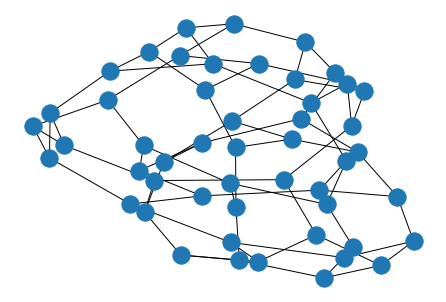

In [7]:
g = nx.random_regular_graph(3, 50)
nx.draw_spring(g)

<div style="visibility: hidden">
The sum of the node degree values is twice the number of edges (see [here](https://en.wikipedia.org/wiki/Modularity_(networks)#Expected_Number_of_Edges_Between_Nodes)), because each of the edges has been counted from both ends.

50 nodes of degree 3 mean there are (50×3)/2=75 edges
```(python)
nx.number_of_edges(g)
```

How many [regions](https://en.wikipedia.org/wiki/Euler_characteristic) are there in a graph has if it has v nodes and e edges? The answer is r=e−v+2
</div>

In the cell below, compute the number of edges of the graph:

And this is what a 50-node Erdős–Rényi graph (where nodes now have a probabilistic degree *distribution*) looks like. Verify that nodes now have *varying* numbers of edges (neighbors):

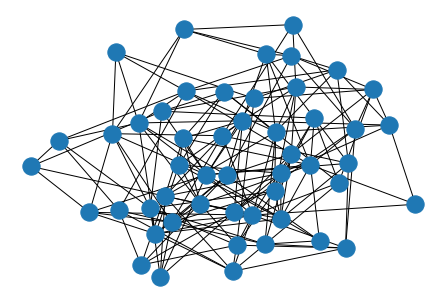

In [8]:
g = nx.erdos_renyi_graph(50, .15)
nx.draw_spring(g)

And this is what a 200-node Erdős–Rényi graph looks like:

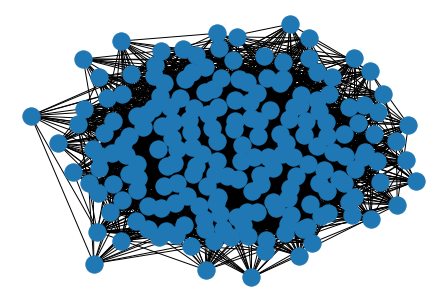

In [9]:
g = nx.erdos_renyi_graph(200, .15)
nx.draw_spring(g)

And with a little bit of artificial tension along the edges (` nx.spring_layout()`), we can make it look prettier. Also, we color the nodes by how far away they are from the center node (colored white).

8


KeyError: 27

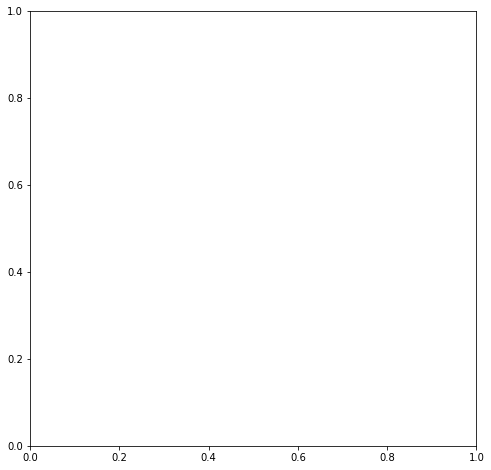

In [10]:
# position is stored as node attribute data for random_geometric_graph
pos = nx.spring_layout(G)
#print(pos)

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
print(ncenter)
        
# color by path length from node near center
p=nx.single_source_shortest_path_length(g, ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(g,pos,nodelist=[ncenter],alpha=0.1)
nx.draw_networkx_nodes(g,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

#plt.xlim(-0.05,1.05)
#plt.ylim(-0.05,1.05)

A **random graph** on the other hand is one where each node has a **normal** probability of having a set number of neighbors. In other words, there is a specific degree (the **mean** of the normal pdf) that will occur much more often than others.

Making a random network is super-easy: Take $n$ nodes and $m$ pairs at random and place the edges between the randomly chosen nodes. Also, you could take $n$ nodes, compute a probability $p$ (from a normal distribution), and create an edge at random to another node.

The Erdős–Rényi graph is a special case where the probability for edge creation $p$ is fixed.

Creating big graphs *fast* confers an important advantage. Drawing them takes a lot longer. 

[This](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) is how you can profile the operation.

In [11]:
%%timeit
g = nx.fast_gnp_random_graph(1000, .15)

127 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Still, ***don't*** run this operation in class, it will take tens of minutes to create a graph of 10,000 nodes with ... edges.

In [12]:
%time nx.fast_gnp_random_graph(10000, .15)

Wall time: 16.2 s


Run this one instead:

In [13]:
%time nx.fast_gnp_random_graph(1000, .15)

Wall time: 114 ms


Wall time: 148 ms


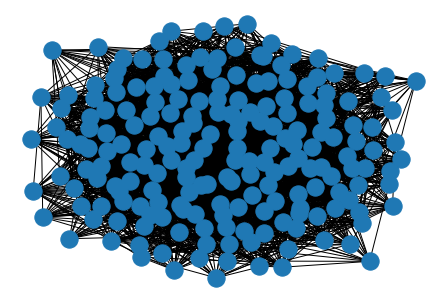

In [14]:
%time nx.draw_spring(g)

You can find some `networkx` graph generators [here](https://networkx.github.io/documentation/networkx-0.37/networkx.generators.random_graphs-pysrc.html).

[A small world](https://en.wikipedia.org/wiki/ASmallWorld) was founded in 2004 as one of the first social networks (long before facebook), and is the leading invitation-only Travel and Lifestyle online community.

Duncan Watts and Steven Strogatz built a [small world graph model](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model): a few random links in an otherwise structured graph make the
network a small world: the average shortest path is short.

Why did they build this?

 ER graphs do not have two important properties observed in many real-world networks:

- They do not generate **local clustering** and **triadic closures**. Instead, because they have a constant, random, and independent probability of two nodes being connected, ER graphs have a low clustering coefficient.
- They do not account for the formation of hubs. Formally, the degree distribution of ER graphs converges to a Poisson distribution, rather than a power law observed in many real-world, scale-free networks.

The Watts and Strogatz (WS) model was designed as the simplest possible model that addresses the first of the two limitations. It accounts for clustering while retaining the short average path lengths of the ER model. It does so by interpolating between a randomized structure close to ER graphs and a regular ring lattice. Consequently, the model is able to at least partially explain the "*small-world*" phenomena in a variety of networks, such as the power grid, neural network of C. elegans, networks of movie actors, 

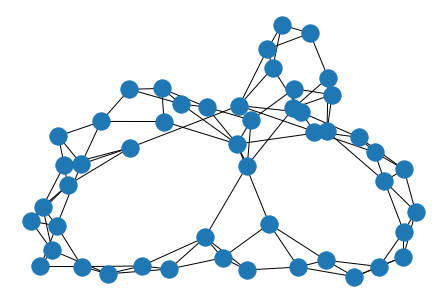

In [15]:
g = nx.watts_strogatz_graph(50, 5, .15)
nx.draw_spring(g)

As for the second weakness of ER graphs, the [Barabási–Albert](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model) (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. What this means is that essentially *many professors want to marry Rihanna*. In other words, some nodes are reall attractors for all nodes, which want to create an edge with them.

Several natural and human-made systems, including the Internet, the world wide web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. The algorithm is named for its inventors [Albert-László Barabási](https://en.wikipedia.org/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si) and Réka Albert and is a special case of an earlier and more general model called Price's model.

The way to create a BA graph of n nodes is to grow it by attaching new nodes each with m edges that are preferentially attached to existing nodes with high degree. Not all nodes will have m neighbors. The initialization is a graph with with m nodes and no edges. Graph creation stops when you reach $n$ nodes.

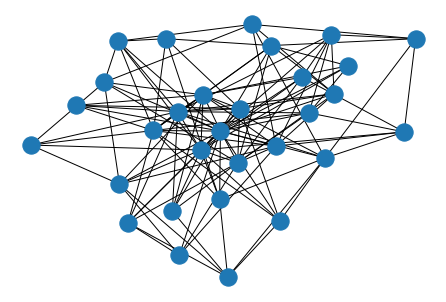

In [16]:
g = nx.barabasi_albert_graph(30, 5)
nx.draw_spring(g)

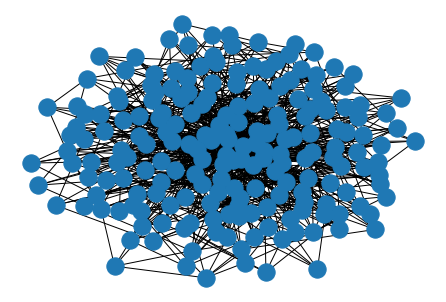

In [17]:
g = nx.barabasi_albert_graph(200, 5)
nx.draw_spring(g)

4


KeyError: 32

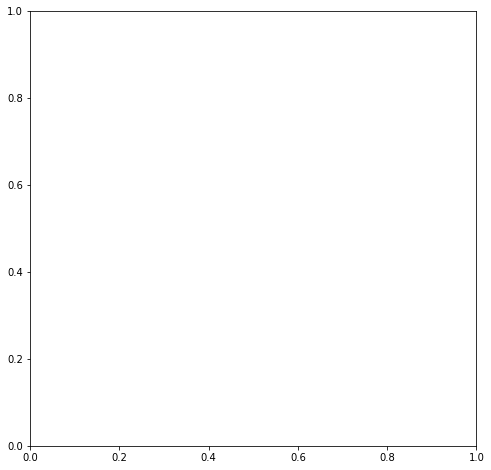

In [18]:
# position is stored as node attribute data for random_geometric_graph
pos = nx.spring_layout(G)
#print(pos)

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
print(ncenter)
        
# color by path length from node near center
p=nx.single_source_shortest_path_length(g,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(g,pos,nodelist=[ncenter],alpha=0.1)
nx.draw_networkx_nodes(g,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

#plt.xlim(-0.05,1.05)
#plt.ylim(-0.05,1.05)

A [geometric graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html) (GG) is grown in an interesting way: The graph model places n nodes uniformly at random in the unit cube. Two nodes are joined by an edge if the distance between the nodes is at most radius. Edges are determined using a `KDTree` when `SciPy` is available. This reduces the time complexity from O($4n^2$) to O($n$).

This is an interesting graph for us because it is the beginning of how we could randomly place people in a city. We will then modify this graph by clustering people into appartment buildings.

The graph is undirected and without self-loops. Each node has a node attribute `pos` that stores the position of that node in Euclidean space as provided by the `pos` API keyword argument or, if `pos` was not provided, as generated by `random_geometric_graph`.

In [ ]:
G=nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

In [ ]:
G=nx.random_geometric_graph(2000, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.1)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

How many neighbors per node?

In [ ]:
list(G.neighbors(0))

In [ ]:
neighs = []
for node_id in G.nodes():
     neighs.append(len(list(G.neighbors(node_id))))
','.join(str(_) for _ in neighs)

In [ ]:
sum(neighs)/2000.

A better metric is the **average degree** of the ***neighborhood*** of each node $i$:

$$k_{nn,i} = \frac{1}{|N(i)|}\, \sum_{j \in N(i)} k_j$$

where $N(i)$ are the neighbors of node $i$ and $k_j$ is the degree of node $j$ which belongs to $N(i)$.

In [ ]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

take(20, nx.average_neighbor_degree(G).items())

Average number of neighbors for the graph?

In [ ]:
sum(nx.average_neighbor_degree(G).values()) / 2000.

Here is the same graph generator, except it also specified a `p` paramter (float, optional) – The [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) metric (a generalization of both Euclidean distance and Manhattan distance) to use ($p$ has to meet the condition $1 <= p <= \infty$). Since we did not specify this argument above, the L2 metric (the Euclidean distance metric), $p = 2$ was used (his should not be confused with the p of an Erdős-Rényi random graph, which represents probability).

The higher the `p`, the more bewildering the graph since it's constructed in a convex space that brings objects closer together.

In [ ]:
G=nx.random_geometric_graph(200, 0.125, p=7)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

A Geometric graph **+** (GG+) is my own invention. It grows like a geometric graph, except that it adds *superclusters* (clusters of supernodes), which are nodes with much denser neighborhoods. Think of these clusters as supermarkets, movie theatres, or rock concerts.

The more appropriate model would be a dynamic model, where superclusters coalesce and disintegrate in time. But let's start with simple.

In [ ]:
G=nx.random_geometric_graph(200, 0.125)
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

This graph has an average of about 10 neighbors per node:

In [ ]:
sum(nx.average_neighbor_degree(G).values()) / 200.

The standard deviation is very small, though (meaning *all* nodes have about the same number of neighbors):

In [ ]:
take(10, nx.average_neighbor_degree(G).items())

In [ ]:
neighbors = [y for x,y in take(20, nx.average_neighbor_degree(G).items())]
np.std(neighbors)

Let's *change that*! We do some prototyping, first:

In [ ]:
def add_and_remove_edges(G, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = []    

    for node in G.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G.add_edge(node, new)    
                print ("\tnew edge:\t {} -- {}".format(node, new))  
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G.remove_edge(node, remove)    
                print ("\tedge removed:\t {} -- {}".format(node, remove))  
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges    

In [ ]:
import random

p_new_connection = 0.1
p_remove_connection = 0.

G = nx.karate_club_graph() # sample graph (undirected, unweighted)
# show original
plt.figure(1); plt.clf()
fig, ax = plt.subplots(2,1, num=1, sharex=True, sharey=True)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, ax=ax[0])

# now apply one round of changes
rem_edges, new_edges = add_and_remove_edges(G, p_new_connection, p_remove_connection)

# and draw new version and highlight changes
nx.draw_networkx(G, pos=pos, ax=ax[1])
nx.draw_networkx_edges(G, pos=pos, ax=ax[1], edgelist=new_edges,
                       edge_color='b', width=4)
# note: to highlight edges that were removed, add them back in;
# This is obviously just for display!
G.add_edges_from(rem_edges)
nx.draw_networkx_edges(G, pos=pos, ax=ax[1], edgelist=rem_edges,
                       edge_color='r', style='dashed', width=4)
G.remove_edges_from(rem_edges)

In [ ]:
neighbors = [y for x,y in take(20, nx.average_neighbor_degree(G).items())]
np.mean(neighbors)

In [ ]:
np.std(neighbors)

Ok, this seems to work, so let's modify `add_and_remove_edges` to create super-clusters:

In [ ]:
def add_superclusters(G, p_new_supercluster, p_new_connection, cluster_max_size):    
    '''    
    for each node,
      if it probabilistically becomes a supercluster with prob p_new_supercluster,
        add a new connection to a random number (less than cluster_max_size) of other nodes, with prob p_new_connection    

    operates on G in-place    
    '''                
    new_edges = []      

    for node in G.nodes(): 
        if random.random() < p_new_supercluster:
            
            # find the other nodes this one is connected to    
            connected = [to for (fr, to) in G.edges(node)]    
            # and find the remainder of nodes, which are candidates for new edges   
            unconnected = [n for n in G.nodes() if not n in connected]    

            # probabilistically add a random edge  
            how_many = cluster_max_size
            while 0 < len(unconnected) and 0 < how_many: # only try if new edge is possible    
                if random.random() < p_new_connection:    
                    new = random.choice(unconnected)    
                    G.add_edge(node, new)    
                    print ("\tnew edge:\t {} -- {}".format(node, new))  
                    new_edges.append( (node, new) )    
                    # book-keeping, in case both add and remove done in same cycle  
                    unconnected.remove(new)    
                    connected.append(new)
                how_many -= 1
   
    return new_edges    

In [ ]:
p_new_supercluster = 0.6
p_new_connection = 0.3
cluster_max_size = 20

G = nx.karate_club_graph() # sample graph (undirected, unweighted)
# show original
plt.figure(1); plt.clf()
fig, ax = plt.subplots(2,1, num=1, sharex=True, sharey=True)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, ax=ax[0])

# now apply one round of changes
new_edges = add_superclusters(G, p_new_supercluster, p_new_connection, cluster_max_size)

# and draw new version and highlight changes
nx.draw_networkx(G, pos=pos, ax=ax[1])
nx.draw_networkx_edges(G, pos=pos, ax=ax[1], edgelist=new_edges,
                       edge_color='b', width=4)

In [ ]:
neighbors = [y for x,y in take(20, nx.average_neighbor_degree(G).items())]
np.mean(neighbors)

In [ ]:
np.std(neighbors)

Now let's apply to a geometric graph:

In [ ]:
G=nx.random_geometric_graph(200, 0.125)
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

In [ ]:
p_new_supercluster = 0.01
p_new_connection = 0.2
cluster_max_size = 40

# now apply one round of changes
new_edges = add_superclusters(G, p_new_supercluster, p_new_connection, cluster_max_size)

In [ ]:
# draw new version and highlight changes

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)
#print(p.values())

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues)

nx.draw_networkx_edges(G, pos=pos, edgelist=new_edges,
                       edge_color='b', width=1)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

We see here how superclusters bring nodes into contact that would usually not be in contact.

## Label propagation

In **Node Classification**, we are given a network that is composed of a set of nodes and a set of edges. The important aspect of this problem is that some part of nodes are given their labels, and some *not*. What we want to do here is to predict the colors (labels) of the unlabeled nodes.

Label Propagation tries to find the optimal coloring that satisfies the following two constraints:
- Constraint1: A node that is given its label must not change its label.
- Constraint2: A pair of connected nodes should have the same labels.

Constraint1 is simple. It just states that the color given to a node must not change. Constraint2 is the core of this algorithm. If a node has a connection with another node whose color is red, the first node should also be red. Note that the first constraint is *must*, but the second constraint is *should*. So we will find the coloring that *minimizes* the number of violations of Constraint2 without *no* violations of Constraint1.

Find all available `matplotlib` colormaps [here](https://matplotlib.org/examples/color/colormaps_reference.html).

In [ ]:
G = nx.Graph()
edges = [('A','X'), ('B','X'), ('X','Y'), ('C','X'), ('C','Y'), ('D','Y')]
G.add_edges_from(edges)
G.nodes['A']['label'] = 'RED'
G.nodes['B']['label'] = 'RED'
G.nodes['C']['label'] = 'BLUE'
G.nodes['D']['label'] = 'RED'
G.nodes['X']['label'] = None
G.nodes['Y']['label'] = None

val_map = {'A': 1.0,
           'B': 1.0,
           'C': 0.0,
           'D': 1.0}

values = [val_map.get(node, 0.5) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Paint the unpainted nodes blue, and count the violations. How many?

Then paint one red, the other blue, then one blue, the other red. How many constraint violations?

Then paint both red, how many constraint violations?

So, which is the optimal solution?

Let's devise an algoithm to solve this automatically.

Let’s initialize "*scores*" for each node: Red nodes are assigned score 0, blue nodes are assigned score 1, and unlabeled nodes are assigned score init_value (here, 0.5).

In [ ]:
def initialize_scores(g, init_value):
    for node_id in g.nodes():
        label = g.nodes[node_id]['label']
        if label == 'RED':
            # Labeled nodes: RED
            g.nodes[node_id]['score'] = 1
        elif label == 'BLUE':
            # Labeled nodes: BLUE
            g.nodes[node_id]['score'] = 0
        else:
            # Unlabeled nodes
            g.nodes[node_id]['score'] = init_value

initialize_scores(G, 0.5)

Let's *propagate* the scores (labels). Recall that the score of an unlabeled node is calculated by taking the average scores of all neighbors. Let’s define a function to do that:

In [ ]:
def calculate_avg_score(g, node_id):
    score_sum = 0
    n_neighbors = 0
    for neighbor_id in g[node_id]:
        score_sum += g.nodes[neighbor_id]['score']
        n_neighbors += 1
    return score_sum / n_neighbors

In [ ]:
calculate_avg_score(G, 'X') # => 0.625

In [ ]:
calculate_avg_score(G, 'Y')

Let's re-color:

In [ ]:
values = [G.nodes[node_id]['score'] for node_id in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Finally, let’s define a function `propagate` that performs one step of propagation:

In [ ]:
def propagate(g):
    next_scores = {}
    for node_id in g.nodes():
        if g.nodes[node_id]['label'] is not None:
            # scores of labeled nodes do not change
            next_scores[node_id] = g.nodes[node_id]['score']
        else:
            next_scores[node_id] = calculate_avg_score(g, node_id)
    for node_id in next_scores:
        g.nodes[node_id]['score'] = next_scores[node_id]

Let's perform one step of propagation:

In [ ]:
propagate(G)

In [ ]:
values = [G.nodes[node_id]['score'] for node_id in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Let’s run 10 steps and see what happens:

In [ ]:
n_steps = 10
for i in range(n_steps):
    propagate(G)
    print("=== After {} steps ===".format(i+1))
    print("X = {}".format(G.nodes['X']['score']))
    print("Y = {}".format(G.nodes['Y']['score']))

In [ ]:
values = [G.nodes[node_id]['score'] for node_id in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

After 10 steps, the scores mostly converged (if we run again, scores don't change):

In [ ]:
propagate(G)
print("=== After one more step ===")
print("X = {}".format(G.nodes['X']['score']))
print("Y = {}".format(G.nodes['Y']['score']))

Now let's bump the scores to the nearest integer and re-paint:

In [ ]:
def bump_score(g):
    for node_id in g.nodes():
         g.nodes[node_id]['score'] = int(round(g.nodes[node_id]['score']))

In [ ]:
bump_score(G)

values = [G.nodes[node_id]['score'] for node_id in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

And that's the solution we were afer!

So now we have an ability to predict the labels of nodes.

To deal with networks with 3 or more labels, we can use the [node_classification](https://networkx.github.io/documentation/stable/reference/algorithms/node_classification.html) module in `NetworkX` version 2.2.

In [ ]:
nx.__version__

We're good!

In [ ]:
G = nx.Graph()
edges = [('A','X'), ('B','X'), ('X','Y'), ('C','X'), ('C','Y'), ('D','Y')]
G.add_edges_from(edges)
G.nodes['A']['label'] = 1.0
G.nodes['B']['label'] = 1.0
G.nodes['C']['label'] = 0.1
G.nodes['D']['label'] = 1.0
G.nodes['X']['label'] = None
G.nodes['Y']['label'] = None

In [ ]:
from networkx.algorithms import node_classification
#G = nx.path_graph(4)
#G.edges()
#EdgeView([(0, 1), (1, 2), (2, 3)])
#G.nodes[0]['label'] = 'A'
#G.nodes[3]['label'] = 'B'
G.nodes()

In [ ]:
node_classification.harmonic_function(G)

Hmm.. don't really know how to use this API..

## Dynamics of infections

Let's build a geometric graph with nodes in 4 different states: `S`usceptible, `I`nfected, `R`ecovered, and `D`dead. We begin our simulation with all nodes susceptible, except for one in Hubei, China, which is infected. We then propagate the infection according to the characteristics of CoVid19 as we computed them in our previous notebook.

>**NOTE**: This is similar to a cellular automation, except the topology is a graph instead of Euclidian space.

We will study the propagation of the infection as a function of different graph types: An ER graph, a WS graph, a BA graph, a GG graph, and a GG+ graph. We see where the infection grows faster, and where it is curtailed. We then build models of protection for citizens.

In [ ]:
G = nx.karate_club_graph()
nx.number_of_nodes(G)

In [ ]:
def seed(g):
    for node_id in g.nodes():
        g.nodes[node_id]['touched'] = 0
        g.nodes[node_id]['state'] = 0

seed(G)

In [ ]:
def seed_infection(g, p_Hubei):
    for node_id in g.nodes():
        if random.random() < p_Hubei:
            g.nodes[node_id]['state'] = 1
            print('node ' + str(node_id) + ' infected!')
            return node_id
        else:
            print('node ' + str(node_id) + ' healthy.')
    return -1

seed_infection(G, 0.05)

In [ ]:
pos = nx.spring_layout(G)
values = [G.nodes[node_id]['state'] for node_id in G.nodes()]
nx.draw(G, pos, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Let's just consider infections:

In [ ]:
def propagate_infection(g, beta):
    num_infected = 0
    for node_id in g.nodes():
        if 1 == g.nodes[node_id]['state']:
            p_infection = beta / len(list(g.neighbors(node_id)))
            for neighbor_id in g[node_id]:
                if random.random() < p_infection:
                    g.nodes[neighbor_id]['state'] = 1
                    num_infected += 1
    return num_infected

In [ ]:
propagate_infection(G, 1)

In [ ]:
values = [G.nodes[node_id]['state'] for node_id in G.nodes()]
nx.draw(G, pos, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

In [ ]:
print(propagate_infection(G, 1))
values = [G.nodes[node_id]['state'] for node_id in G.nodes()]
nx.draw(G, pos, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Now we consider infections, recoveries, and deaths:

In [ ]:
def seed_infection(g, p_Hubei, how_many_infected):
    infected = []
    for node_id in g.nodes():
        g.nodes[node_id]['touched'] = 0
        if random.random() < p_Hubei and 0 < how_many_infected:
            g.nodes[node_id]['state'] = 'infected'
            print('node ' + str(node_id) + ' infected!', 'With ' + str(len(list(G.neighbors(node_id)))) + ' neighbors')
            infected.append(node_id)
            how_many_infected -= 1
        else:
            g.nodes[node_id]['state'] = 'susceptible'
            #print('node ' + str(node_id) + ' healthy.', g.nodes[node_id]['state'])
    return how_many_infected

def seed_infection(g, n, verbosity=0):
    g.nodes[n]['state'] = 'infected'
    g.nodes[n]['touched'] = 0
    if 0 < verbosity: print('node ' + str(n) + ' infected!', 'With ' + str(len(list(G.neighbors(n)))) + ' neighbors')
    for node_id in g.nodes():
        if node_id != n:
            g.nodes[node_id]['state'] = 'susceptible'
            g.nodes[node_id]['touched'] = 0

#if 1 == seed_infection(G, 0.05, 1): print('*** noone infeected! Please rerun.')
seed_infection(G, 0, verbosity=1)

In [ ]:
# make sure all nodes are only processed once (using g.nodes[neighbor_id]['touched'] flag)
def propagate_infection(g, beta, gamma, r, f, verbosity = 0):
    num_infected = 0
    for node_id in g.nodes():
        if 0 < verbosity: print(str(node_id), g.nodes[node_id]['state'])
        if 'infected' == g.nodes[node_id]['state'] and 0 == g.nodes[node_id]['touched']:
            if 0 < verbosity: print('in infected clause..')
            p_infection = beta / len(list(g.neighbors(node_id)))
            p_reinfection = beta / len(list(g.neighbors(node_id))) / 10.
            p_recovery = r 
            p_death = f
            
            # first, neighbor disposition
            for neighbor_id in g[node_id]:
                if 'recovered' == g.nodes[neighbor_id]['state'] and 0 == g.nodes[neighbor_id]['touched']:  ##temporary immunity
                    if 0 < verbosity: print('in recovered neighbor..')
                    if random.random() < p_reinfection:
                        g.nodes[neighbor_id]['state'] = 'infected'  #neighbor reinfected!
                        g.nodes[neighbor_id]['touched'] = 1
                        if 0 < verbosity: print('****** reinfected a neighbor!')
                        num_infected += 1
                elif 'susceptible' == g.nodes[neighbor_id]['state'] and 0 == g.nodes[neighbor_id]['touched']:
                    if 0 < verbosity: print('in susceptible neighbor..')
                    if random.random() < p_infection:
                        g.nodes[neighbor_id]['state'] = 'infected'  #neighbor infected
                        g.nodes[neighbor_id]['touched'] = 1
                        if 0 < verbosity: print('*** infected a neighbor!')
                        num_infected += 1
                        
            # then, self-disposition              
            if random.random() < p_recovery:
                g.nodes[node_id]['state'] = 'recovered'
                g.nodes[node_id]['touched'] = 1
                if 0 < verbosity: print('recovered!')
            elif random.random() < p_death:
                g.nodes[node_id]['state'] = 'dead'
                g.nodes[node_id]['touched'] = 1
                if 0 < verbosity: print('died!')

    for node_id in g.nodes():
        g.nodes[node_id]['touched'] = 0
        
    return num_infected

In [ ]:
seed_infection(G, 0, verbosity=1)

In [ ]:
val_map = {'susceptible': 0.0, 'recovered': 0.3, 'infected': 0.6, 'dead': 1.0}
values = [val_map.get(G.nodes[node_id]['state'], 0.5) for node_id in G.nodes()]
print(values)
nx.draw(G, pos, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

In [ ]:
print(propagate_infection(G, 4, 1, 0.1, 0.01, verbosity=1))

In [ ]:
val_map = {'susceptible': 0.0, 'recovered': 0.3, 'infected': 0.6, 'dead': 1.0}
values = [val_map.get(G.nodes[node_id]['state'], 0.5) for node_id in G.nodes()]
print(values)
nx.draw(G, pos, cmap=plt.get_cmap('bwr'), node_color=values, with_labels=True, font_color='white')

Using `matplotlib`'s `tab20b` or `Paired` [colormaps](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), which are the following:

</br >
<center>
<img src="ipynb.images/tab20b.png" width=600 />
</center>

</br >
<center>
<img src="ipynb.images/paired.png" width=600 />
</center>

In [ ]:
print(propagate_infection(G, 4, 1, 0.1, 0.01))
values = [val_map.get(G.nodes[node_id]['state'], 0.5) for node_id in G.nodes()]
print(values)
nx.draw(G, pos, cmap=plt.get_cmap('tab20b'), node_color=values, with_labels=True, font_color='white')

In [ ]:
%matplotlib notebook
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.patch.set_alpha(0.1)
plt.ion()

# reseed graph
seed_infection(G, 0)

fig.show()
fig.canvas.draw()

#iterate - plot, erase
for i in range(0, 50):
    #print i
    ax.clear() # - Clear

    propagate_infection(G, 4, 1, 0.1, 0.01)
    values = [val_map.get(G.nodes[node_id]['state'], 0.5) for node_id in G.nodes()]
    #print(values)
    nx.draw(G, pos, cmap=plt.get_cmap('Paired'), node_color=values, with_labels=True, font_color='white')
    
    #ax.patch.set_alpha(0.1)
    fig.canvas.draw()   # draw
    time.sleep(1.0)    #sleep

# Homework

Now write a function that tallies up total dead for each graph network type, and run some simulations to plot number of dead versus infection parameters (specifically, beta, r, and f). What social distancing measures would you enact in your country to safeguard the population?